##### 1 Descargar un conjunto de datos, Crop_recommendation.csv1, para realizar el trabajo práctico

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

In [2]:
dataframe = pd.read_csv('Crop_recommendation.csv')
dataframe.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Descripcion de las columnas
- N: Proporcion de Nitrogeno en el suelo (mg/kg)
- P: Proporcion de Fosforo en el suelo (mg/kg)
- K: Proporcion de Potasio en el suelo (mg/kg)
- Temperature: Temperatura registrada en grados celsius
- Humidity: porcentaje de humedad registrada
- ph: valor de ph registrado en el suelo
- Rainfall: lluvia registrada en mm
- label: nombre de la semilla

#### 2 Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y elegir un método de estandarización.

### Buscamos valores faltantes
observamos que ninguna de las columnas tiene valores faltantes

In [3]:
dataframe.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

tambien observamos que no hay valores repetidos

In [4]:
dataframe.duplicated().sum()

0

### Vemos los tipos de datos
N P y K son valores enteros, temperatura, humedad, ph y lluvia son floats y label es un string

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Cuantas semillas hay?
22

In [6]:
dataframe['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Analisis de las columnas

-

-

-

-

-

-

-



In [7]:
dataframe.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


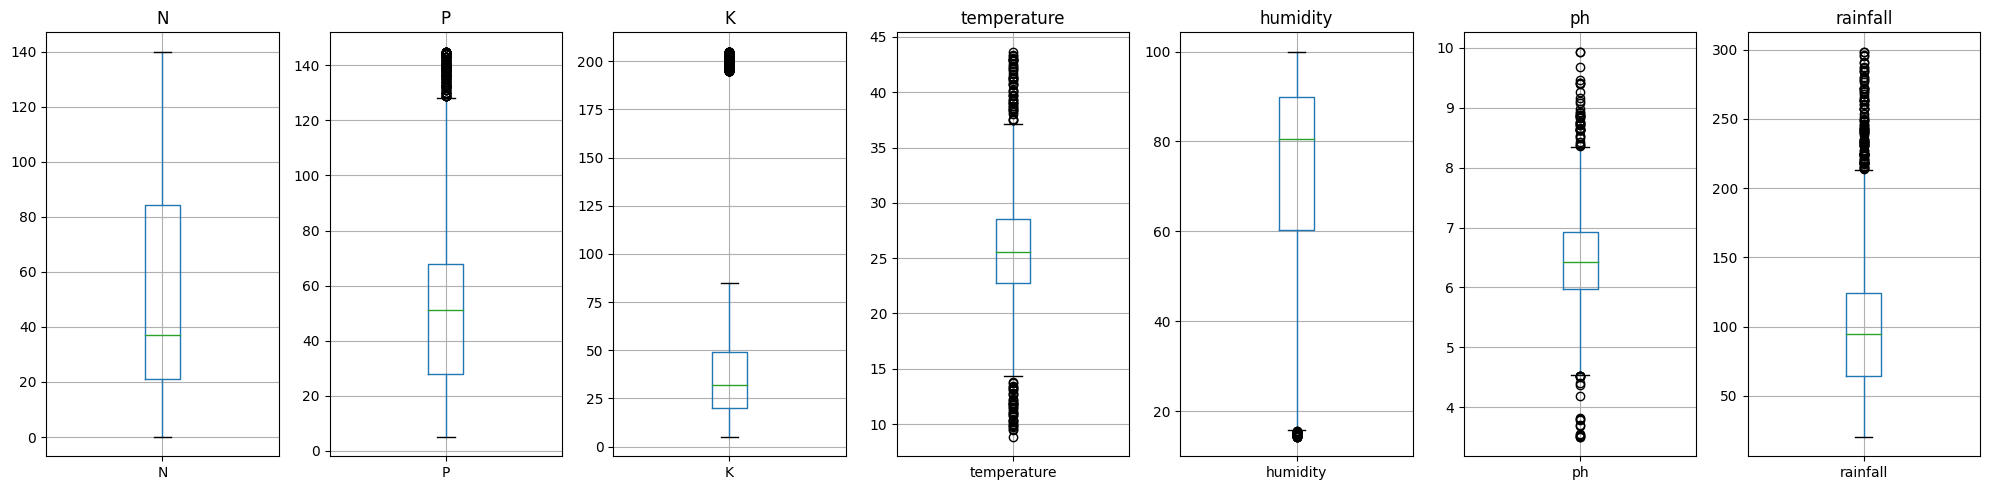

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 5))
for i, col in enumerate(dataframe.columns[:7]):
    dataframe.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Vemos que la mayoria de columnas tienen algunos valores atipicos, pero la mayoria estan cerca entre ellos, salvo en K. La explicacion a esto esta mas abajo

In [9]:
columns = [
    'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'
]

In [11]:
dataframe['temperature'].value_counts()

temperature
20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: count, Length: 2200, dtype: int64

In [12]:
numeric_columns = numeric_columns = [column for column in dataframe.columns if column != 'label']

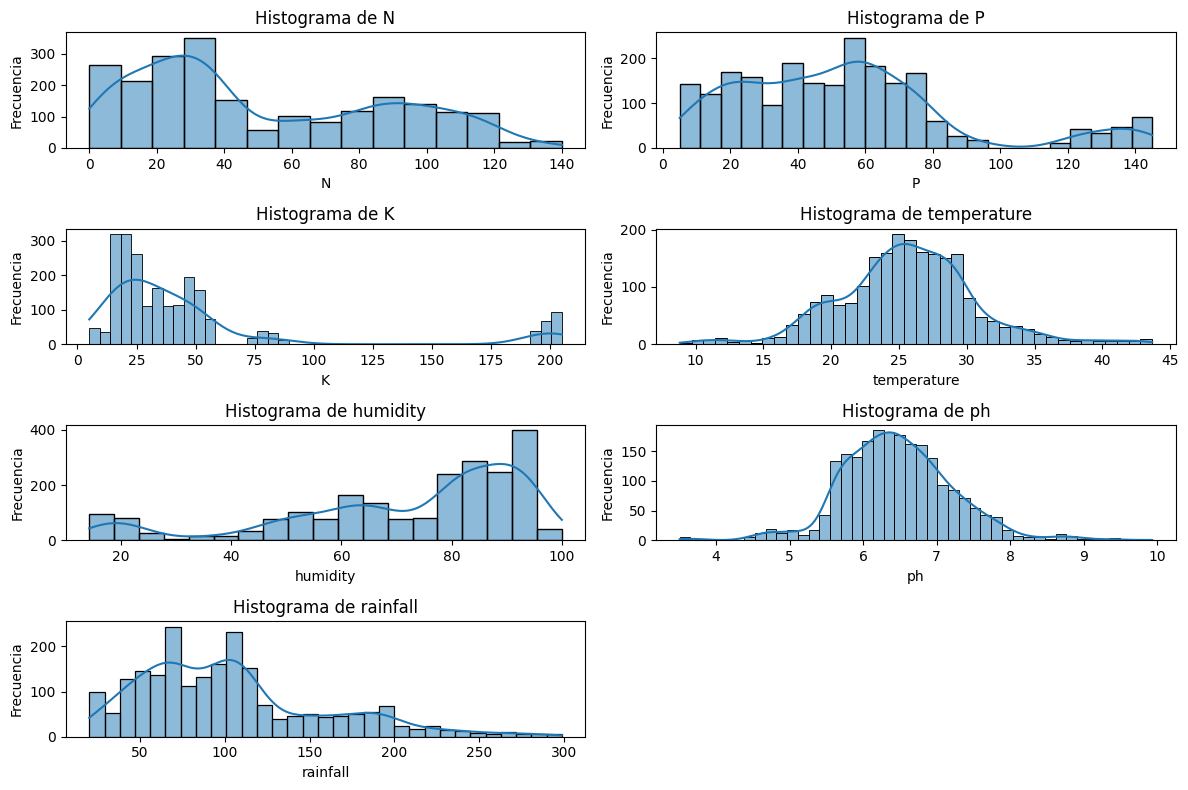

In [55]:
plt.figure(figsize=(12, 8))

for i, columna in enumerate(numeric_columns):
    plt.subplot((len(numeric_columns) + 1)//2, 2, i+1)  # Divide la figura en subplots
    sns.histplot(dataframe[columna], kde=True)  # Crea el histograma
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

Las distribuciones de los nutrientes y rainfall son similares, asimetricas hacia la derecha

La distribucion de humidity es al reves, asimetrica a la izquierda pero tiene sentido

ph y temperatura son simetricas

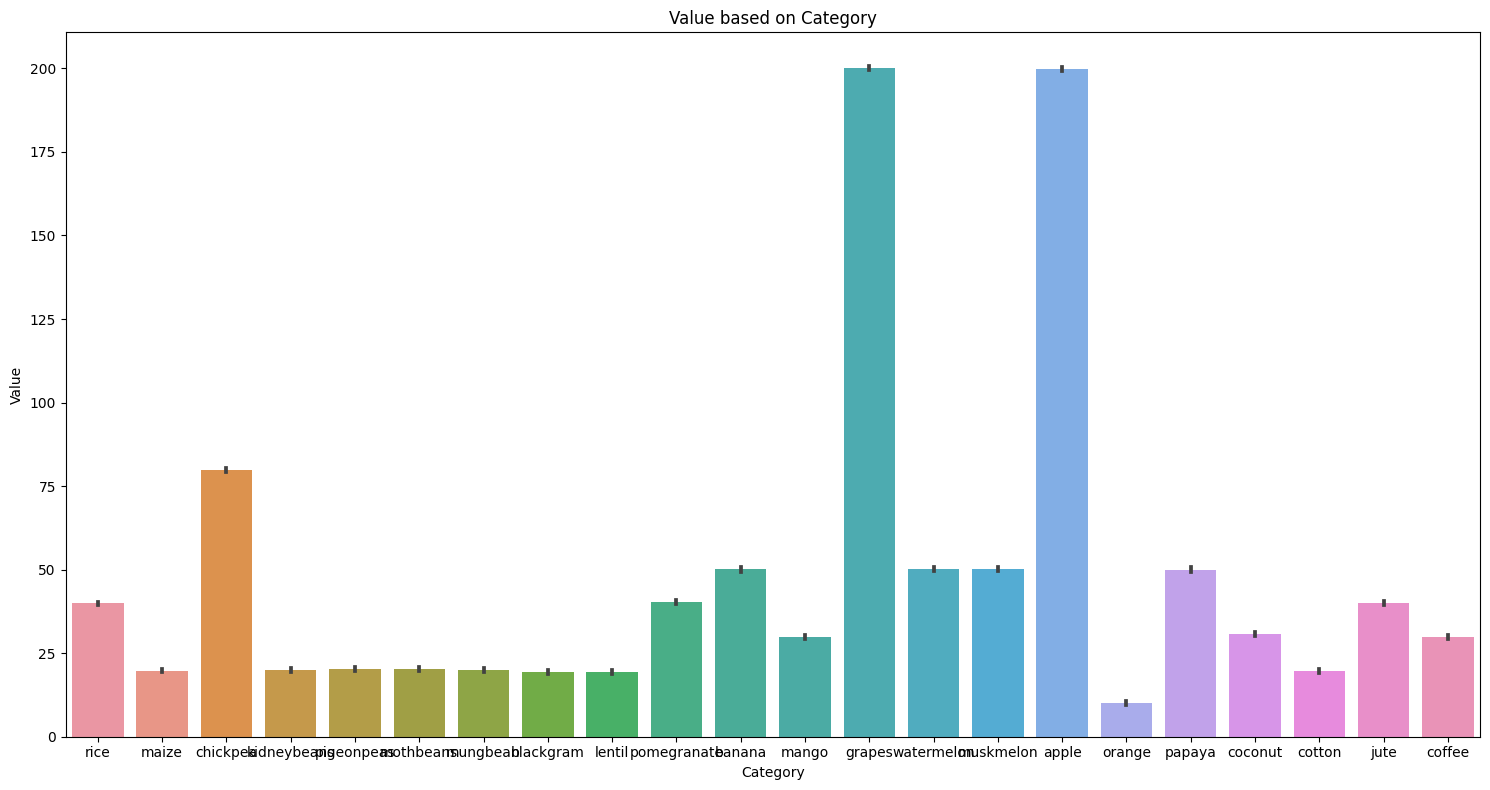

In [63]:
plt.figure(figsize=(15, 8))
sns.barplot(x='label', y='K', data=dataframe)
plt.title('Value based on Category')
plt.xlabel('Category')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

Los valores atipicos de K: se puede observar que las frutas que mas cantidad de potasio presentan en las muestras del suelo son uvas y manzanas esto se debe a que uno de los ferilizantes a usar para estas semillas es el sulfato de potasio

### Normalizar los datos mediante la tecnica de Z-Score

Esta tecnica escala cada feature restando su media y la divide por su desvio estandar, esto genera que todos tengan media = 0 y desvio estandar = 1

In [14]:
df_sub = dataframe[dataframe.describe().columns]

dataframe_escalado = (df_sub-df_sub.mean())/df_sub.std()

In [15]:
dataframe_escalado

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714
...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447


# 3 Realizar PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
# Obtener todas las componentes principales
pca = PCA(n_components=df_sub.shape[1])

pca_features = pca.fit_transform(dataframe_escalado)

# PC dataframe
pca_df = pd.DataFrame(
    data=pca_features,
    columns=df_sub.columns)


nuevos_nombres = {'N': 'PC1',
                  'P': 'PC2',
                  'K': 'PC3',
                  'temperature': 'PC4',
                  'humidity': 'PC5',
                  'ph': 'PC6',
                  'rainfall': 'PC7'}

pca_df.rename(columns=nuevos_nombres, inplace=True)

pca_df['label'] = dataframe['label']

In [18]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.582737,-0.844394,1.373031,-1.613762,0.308154,-0.095975,-0.025234,rice
1,-0.474527,-0.784716,1.251893,-1.792355,1.107493,-0.532134,-0.280479,rice
2,-0.633924,-0.694365,1.179064,-1.817692,2.522690,-0.538428,-0.105943,rice
3,-1.047682,-1.087411,1.393035,-0.982177,1.448452,-0.656779,0.275209,rice
4,-0.873059,-0.658523,1.455354,-2.334481,1.959188,-0.317952,0.052728,rice
...,...,...,...,...,...,...,...,...
2195,-1.260634,-0.618222,0.711136,-1.014740,0.133200,-1.122004,0.306955,coffee
2196,-1.355275,-0.154008,0.701489,-0.197638,-0.898453,-0.771301,0.684801,coffee
2197,-1.158120,-0.640329,1.045602,-1.301545,-0.491653,-0.884927,0.203417,coffee
2198,-1.218911,0.052378,0.180814,-0.990274,-0.601252,-1.308669,0.509541,coffee


In [19]:
pd.DataFrame(pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], 
             index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.302191,0.643787,0.622607,-0.212428,-0.068483,-0.226943,-0.072532
X2,-0.334107,-0.034358,-0.283829,-0.359487,-0.737917,0.220657,-0.290158
X3,-0.112045,-0.109939,-0.163173,-0.248228,-0.213599,-0.548520,0.735267
X4,-0.541651,-0.046293,-0.154867,0.690826,-0.067171,-0.395700,-0.205318
X5,-0.507785,0.082331,0.033425,0.154865,0.128871,0.651881,0.518382
X6,-0.482904,-0.376847,-0.028967,-0.500418,0.547871,-0.125712,-0.239930
X7,-0.008473,-0.649104,0.692268,0.111282,-0.289624,0.040028,0.038577


### Funcion para la variancia acumulada

In [20]:
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [21]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 'Proporción de variancia explicada':pca.explained_variance_ratio_, 
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,1.931218,0.275888,0.275888
1,1.293910,0.184844,0.460733
2,1.076509,0.153787,0.614520
3,1.022891,0.146127,0.760647
4,0.805928,0.115133,0.875780
5,0.676562,0.096652,0.972431
6,0.192981,0.027569,1.000000


- Con respecto a la proporcion de varianza explicada tomariamos las 4 primeras componentes ya que llegan a explicar mas del 75% de los datos.

- Teniendo en cuenta la regla de Kaiser (eigenvalues > 1) tambien se toman las primeras 4 variables

*No vamos a tomar las 4 primeras componentes ya que el enunciado pide un grafico en 2D y solo puedo graficar hasta 3D*



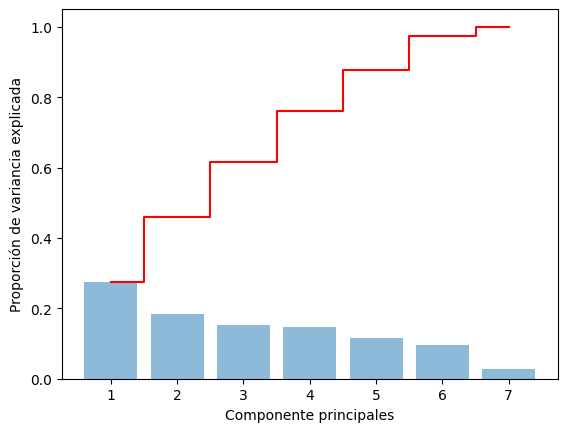

In [22]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

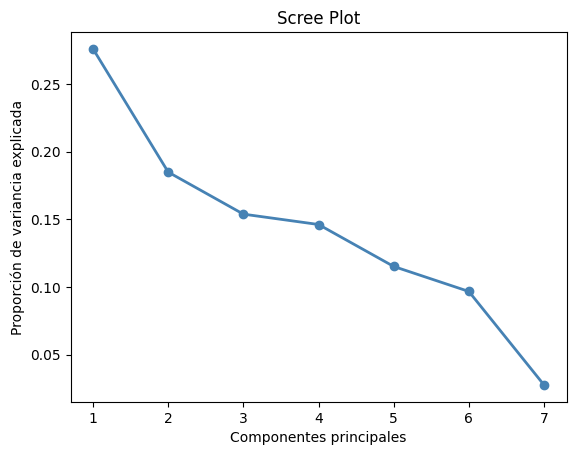

In [23]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

### Corroboramos que el calculo de nuestros PC's es correcto (deben ser ortogonales)

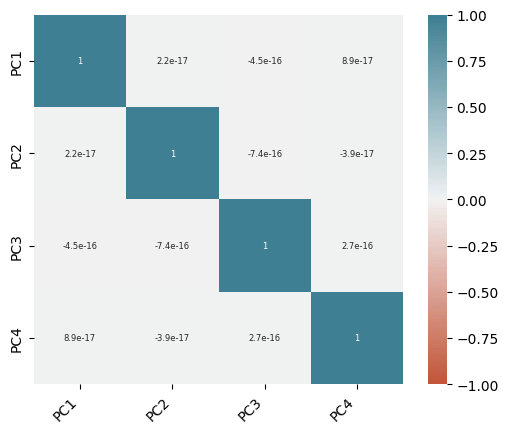

In [24]:
corr = pca_df[['PC1', 'PC2', 'PC3', 'PC4']].corr()

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [25]:
import plotly.express as px

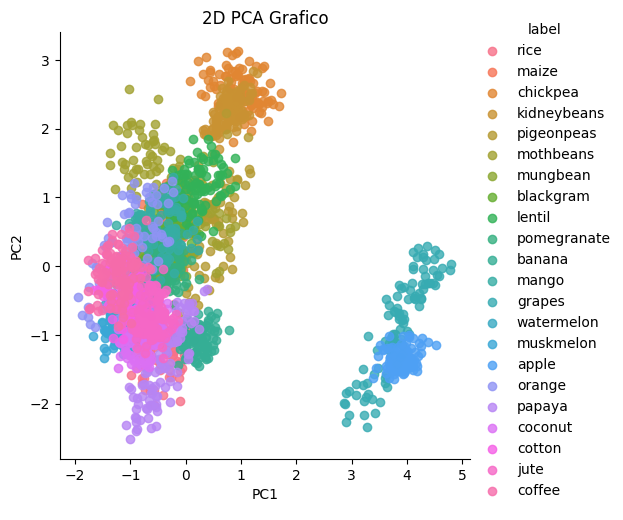

In [26]:
sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='label', fit_reg=False, legend=True)

plt.title('2D PCA Grafico')

plt.show()

### Isomap

In [27]:
from sklearn.manifold import Isomap

Isomap busca mantener las distancias geodesicas (distancia minima entre dos puntos en una superficie, una linea recta (como desenrrollar un papel))

Funciona estableciendo vecinos entre los valores del conjunto de datos y busca una representacion euclideana

estas distancias geodesicas entre los puntos van conformando un grafo y es un problema de distancia (dijkstra o bellman ford)

In [64]:
isomap_df = Isomap(n_neighbors=200, n_components=3)
isomap_df.fit(dataframe_escalado)
projections_isomap = isomap_df.transform(dataframe_escalado)
#scatter_3d
fig = px.scatter(
    projections_isomap, x=0, y=1, #z=2
    color=dataframe['label'], labels={'color': 'class'}
)
fig.update_traces(marker_size=5)
fig.show()

- Vemos un grupo que se formo de grapes y apples lo que confirma la idea de los valores atipicos
- Que el resto este tan agrupado me confirma que hay similitudes en el tipo de caracteristica que estamos observando

### T-SNE

con una perplejidad de 45 los clusters se ven "estirados" lo que indica que es muy alta
con 10 no se llegan a formar clusters bien definidos por lo que nos quedamos con 15, con este valor podemos empezar a ver cierta formacion de grupos de datos, 15 es un valor tomado heuristicamente.


In [29]:
from sklearn.manifold import TSNE

In [66]:
tsne = TSNE(n_components=3, random_state=0, perplexity=45, n_iter=1000)
projections_tsne = tsne.fit_transform(dataframe_escalado, )

fig = px.scatter(
    projections_tsne, x=0, y=1, #z=2,
    color=dataframe['label'], labels={'color': 'class'}
)
fig.update_traces(marker_size=5)
fig.show()

In [31]:
tsne = TSNE(n_components=3, random_state=0, perplexity=15)
projections_tsne = tsne.fit_transform(dataframe_escalado, )

fig = px.scatter(
    projections_tsne, x=0, y=1, #z=2,
    color=dataframe['label'], labels={'color': 'class'}
)
fig.update_traces(marker_size=5)
fig.show()

# 6 K-Means

In [32]:
from sklearn.cluster import KMeans

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

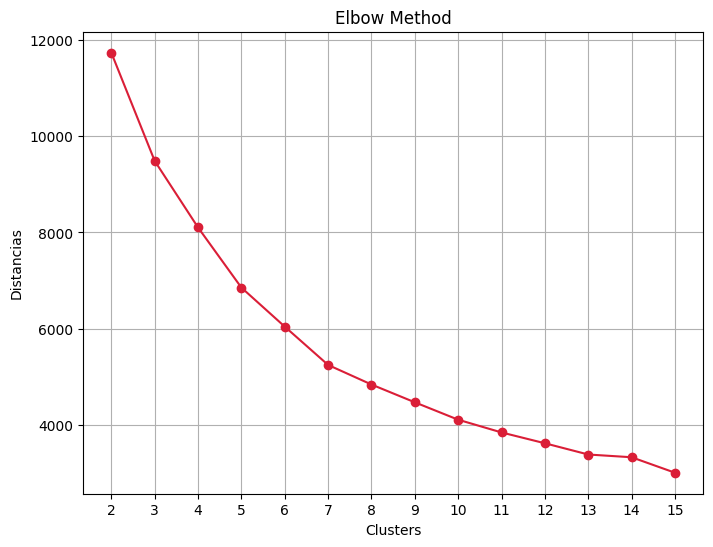

In [33]:
distancias = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(dataframe_escalado)
    distancias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 16), distancias, marker='o', color = '#da1e37')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Distancias')
plt.xticks(np.arange(2, 16))
plt.grid(True)
plt.show(block=True)

La mayor distancia se reduce hasta el sexto cluster por lo que uso esa cantidad

In [34]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(dataframe_escalado)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6)

In [35]:
crop_kmeans_df = dataframe
crop_kmeans_df['clusters'] = kmeans.labels_
crop_kmeans_df.tail()


,N,P,K,temperature,humidity,ph,rainfall,label,clusters
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,3
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,3
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,3
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3


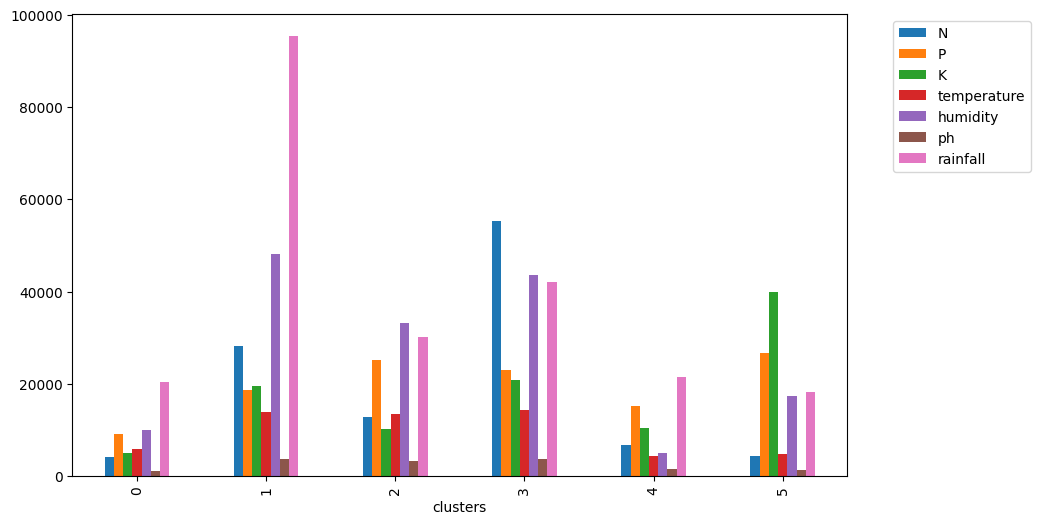

In [36]:
crop_kmeans_df.groupby('clusters').sum().plot(kind='bar', figsize=(10, 6))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Grafico de clusters

In [37]:
fig = px.scatter_3d(crop_kmeans_df[['K', 'N', 'P']], x='K', y='N', z='P',
              color=crop_kmeans_df['clusters'], labels={'color': 'clusters'})
fig.update_layout(title = "6 Clusters de Kmeans para K, P y N")
fig.show(block=True)

In [76]:
fig = px.scatter_3d(crop_kmeans_df, x='N', y='P', z='K',
              color=crop_kmeans_df['label'], labels={'color': 'label'})
fig.update_layout(title = "Distribución original de los cultivos para K, P y N")
fig.show(block=True)

GAP numero optimo de clusters

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
def calculate_intra_cluster_dispersion(X, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    return kmeans.inertia_

In [74]:
gaps = []
max_k = 60
for k in range(1, max_k + 1):
    # Calculo la inercia real sobre mis datos reales
    real_inertia = calculate_intra_cluster_dispersion(dataframe_escalado, k)
    #Calculo al inercia de datos aleatorios con la mismsa estrucutra que mis datos originales
    inertia_list = []
    for _ in range(10):
      random_data = np.random.rand(*dataframe_escalado.shape)
      intra_cluster_dispersion = calculate_intra_cluster_dispersion(random_data, k)
      inertia_list.append(intra_cluster_dispersion)

    reference_inertia = np.mean(inertia_list)

    #Aplico la funcion de gap
    gap = np.log(reference_inertia) - np.log(real_inertia)
    gaps.append(gap)


optimal_k = np.argmax(gaps) + 1

Número óptimo de clusters según el Gap Statistic: 58


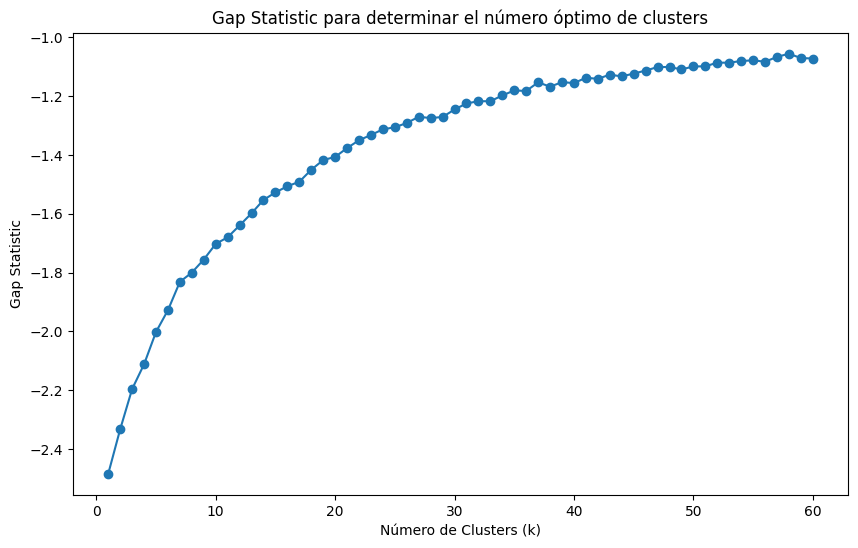

In [75]:
print("Número óptimo de clusters según el Gap Statistic:", optimal_k)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), gaps, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic para determinar el número óptimo de clusters')
plt.show()

# 7 Clustering Jerarquico

In [41]:
import scipy.cluster.hierarchy as sch

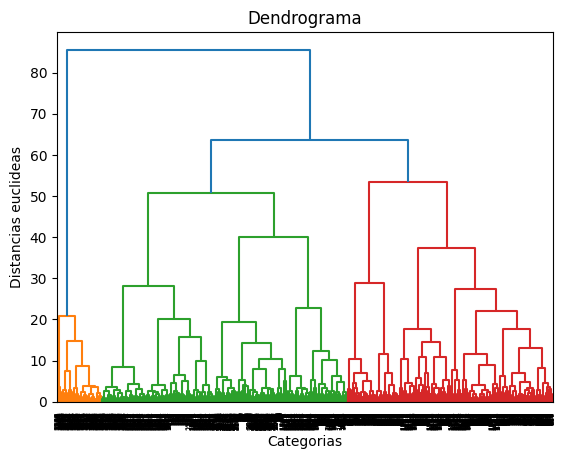

In [42]:
linkage = sch.linkage(dataframe_escalado, method='ward')
dendrogram = sch.dendrogram(linkage)

plt.title('Dendrograma')
plt.xlabel('Categorias')
plt.ylabel('Distancias euclideas')
plt.show(block=True)

In [43]:
linkage = sch.linkage(dataframe_escalado, method='ward')

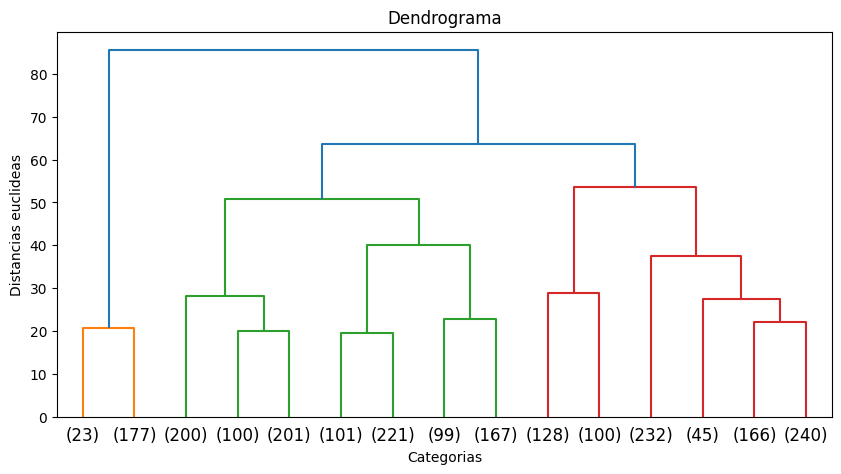

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

dendrogram = sch.dendrogram(linkage, truncate_mode='lastp', p=15)

plt.title('Dendrograma')
plt.xlabel('Categorias')
plt.ylabel('Distancias euclideas')
plt.show(block=True)

# Silhouette

In [45]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [46]:
n_clusters = 6
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_jerarq = clustering.fit_predict(dataframe_escalado)

dataframe_jerarquico = dataframe
dataframe_jerarquico['cluster_jerarquico'] = cluster_jerarq

In [47]:
dataframe_jerarquico.head()

,N,P,K,temperature,humidity,ph,rainfall,label,clusters,cluster_jerarquico
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1,5
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1,5
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1,5
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1,5
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1,5


In [67]:
print(f'Silhouette score con (n=6) clusters: {silhouette_score(dataframe_escalado, cluster_jerarq)}')

Silhouette score con (n=6) clusters: 0.32472816085088896


In [49]:
dataframe_jerarquico['cluster_jerarquico'] = dataframe_jerarquico['cluster_jerarquico'].astype(str)

In [50]:
fig = px.scatter_3d(dataframe_jerarquico[['K', 'N', 'P']], x='K', y='N', z='P',
              color=dataframe_jerarquico['cluster_jerarquico'], labels={'color': 'Cluster aglomerativo'})
fig.update_layout(title = "6 Clusters para K, P y N")
fig.show(block=True)

In [51]:
fig = px.scatter_3d(dataframe_jerarquico, x='N', y='P', z='K',
              color=dataframe_jerarquico['label'], labels={'color': 'Cultivo'})
fig.update_layout(title = "Distribucion original de los cultivos para K, P y N")
fig.show(block=True)

In [52]:
n_clusters = 12
clustering = AgglomerativeClustering(n_clusters=n_clusters)

cluster_jerarq = clustering.fit_predict(dataframe_escalado)

dataframe_jerarquico = dataframe
dataframe_jerarquico['cluster_jerarquico'] = cluster_jerarq

In [53]:
print(f'Silhouette score (n=12): {silhouette_score(dataframe_escalado, cluster_jerarq)}')

Silhouette score (n=12): 0.32472816085088896


In [54]:
fig = px.scatter_3d(dataframe_jerarquico[['K', 'N', 'P']], x='K', y='N', z='P',
              color=dataframe_jerarquico['cluster_jerarquico'], labels={'color': 'Cluster aglomerativo'})
fig.update_layout(title = "12 Clusters para K, P y N")
fig.show(block=True)